# TSFresh exploration

In [8]:
from tsfresh import select_features, extract_relevant_features, extract_features
from tsfresh.utilities.dataframe_functions import impute
from get_processed_data import get_processed_data, get_train_test_split, processed_data_malte, processed_data_luis
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from tsfresh.transformers import RelevantFeatureAugmenter
from sklearn.metrics import classification_report


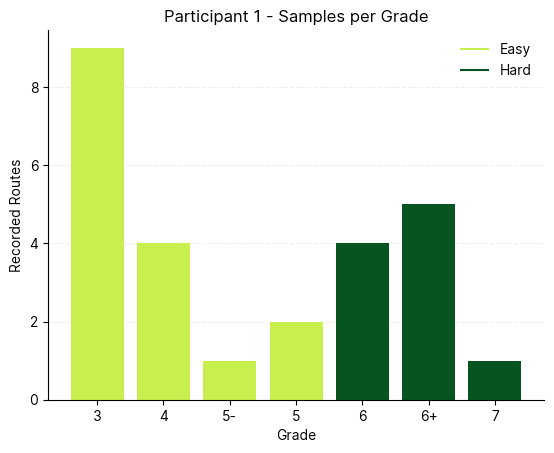

In [5]:

# plot the amount of samples per class
grades = {}

for grade, data in processed_data_malte.items():
    grades[grade] = len(data)


# plot

import matplotlib.pyplot as plt
import numpy as np

# set font
plt.rc('font', family='Inter')

easy_col = "#C7EF4E"
hard_col = "#085420"

# color bars with 3, 4, 5-, 5 with green and 6, 6+, 7 with red
colors = [easy_col, easy_col, easy_col, easy_col, hard_col, hard_col, hard_col]
plt.bar(grades.keys(), grades.values(), color=colors)
plt.xlabel('Grade')
plt.ylabel('Recorded Routes')
plt.title('Participant 1 - Samples per Grade')

#  add legend for colors
# from matplotlib.patches import Patch
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], color=easy_col, label='Easy'),
                   Line2D([0], [0], color=hard_col, label='Hard')]
plt.legend(handles=legend_elements, frameon=False)



# remove border
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# add grid in background

plt.grid(axis='y', linestyle='--', alpha=0.2)
plt.gca().set_axisbelow(True)



# set dpi
plt.savefig('exports/amount_of_samples_per_grade.png', dpi=300)

# add title


plt.show()


In [9]:
seconds = 0

for grade, data in processed_data_malte.items():
    for run in data:
        # add max of run["SampleTimeFine"], which is in microseconds, to seconds
        seconds += max(run["SampleTimeFine"]) / 1_000_000
        
for grade, data in processed_data_luis.items():
    for run in data:
        # add max of run["SampleTimeFine"], which is in microseconds, to seconds
        seconds += max(run["SampleTimeFine"]) / 1_000_000

print(f"Total seconds: {seconds}")
print(f"Total minutes: {seconds / 60}")
print(f"Total hours: {seconds / 60 / 60}")



Total seconds: 2917.099228
Total minutes: 48.61832046666667
Total hours: 0.8103053411111111
